# Data Engineering

## Read the Data

In [1]:
import pandas as pd
import holidays
import os

In [2]:
attendanceDF=pd.read_csv('attendance.csv')
entityDF=pd.read_csv('entity_schedule.csv')
attractionDF = pd.read_csv('link_attraction_park.csv', delimiter=';')
weather_data=pd.read_csv('weather_data.csv')
paradeDF=pd.read_excel('parade_night_show.xlsx')
glossaryDF=pd.read_excel('glossary.xlsx')
waitingdf=pd.read_csv('/Users/vivianwang/Downloads/OneDrive_1_2-19-2024/waiting_times.csv')
paradeDF.drop(['Unnamed: 0'], inplace=True, axis=1)

## Merge the Dataset

#### 15mins Base: Weather + waiting time+ night show 


In [3]:
weather_data['date'] = weather_data.dt_iso.apply(lambda x:pd.to_datetime(x[:13]))
weather_data2 = weather_data[weather_data.date>= '2018-01-01'][weather_data.date <= '2022-08-18']
weather_data2['merge_index'] = weather_data2.dt_iso.apply(lambda x:x[:13])
weather_data2.drop(columns = ['date'],inplace = True)
waitingdf['merge_index'] = waitingdf.DEB_TIME.apply(lambda x:x[:13])

/var/folders/dp/4_t_qbl93db5chwk2q5m91540000gn/T/ipykernel_16013/3067795728.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weather_data2 = weather_data[weather_data.date>= '2018-01-01'][weather_data.date <= '2022-08-18']


In [4]:
result = pd.merge(waitingdf,weather_data2,on = 'merge_index',how = 'left')
result.drop(columns = ['merge_index'],inplace = True)
result = result.dropna(subset = ['dt_iso'])
# result.to_parquet('DataInMinute.parquet')

##### Attraction

In [5]:
#select the PortAventura World park
port_attraction_DF=attractionDF[attractionDF['PARK']=='PortAventura World']
#count the unique attraction of the park 
print(port_attraction_DF['PARK'].value_counts())

PortAventura World    26
Name: PARK, dtype: int64


- the port_attraction_DF will be use to select entity that belongs to PortAventura

In [6]:
#select the PortAventura World attraction in result
waitingtime_df=result[result['ENTITY_DESCRIPTION_SHORT'].isin(port_attraction_DF['ATTRACTION'])]

In [7]:
#show me all the columns of the waitingtime_df head(10)
print(waitingtime_df.columns)
waitingtime_df.head(10)

Index(['WORK_DATE', 'DEB_TIME', 'DEB_TIME_HOUR', 'FIN_TIME',
       'ENTITY_DESCRIPTION_SHORT', 'WAIT_TIME_MAX', 'NB_UNITS',
       'GUEST_CARRIED', 'CAPACITY', 'ADJUST_CAPACITY', 'OPEN_TIME', 'UP_TIME',
       'DOWNTIME', 'NB_MAX_UNIT', 'dt', 'dt_iso', 'timezone', 'city_name',
       'lat', 'lon', 'temp', 'visibility', 'dew_point', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'sea_level', 'grnd_level',
       'humidity', 'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h',
       'snow_1h', 'snow_3h', 'clouds_all', 'weather_id', 'weather_main',
       'weather_description', 'weather_icon'],
      dtype='object')


,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2018-01-01,2018-01-01 21:00:00.000,21,2018-01-01 21:15:00.000,Roller Coaster,0,2.0,0.0000,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,39.0,802.0,Clouds,scattered clouds,03n
1,2018-01-01,2018-01-01 19:30:00.000,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0000,254.749,254.75,...,NaN,NaN,NaN,NaN,NaN,23.0,801.0,Clouds,few clouds,02n
2,2018-01-01,2018-01-01 22:30:00.000,22,2018-01-01 22:45:00.000,Rapids Ride,0,1.0,0.0000,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,51.0,803.0,Clouds,broken clouds,04n
3,2018-01-01,2018-01-01 12:45:00.000,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0000,250.001,250.00,...,NaN,0.92,NaN,NaN,NaN,99.0,500.0,Rain,light rain,10d
5,2018-01-01,2018-01-01 18:15:00.000,18,2018-01-01 18:30:00.000,Free Fall,50,3.0,0.0000,0.000,0.00,...,NaN,0.24,NaN,NaN,NaN,67.0,500.0,Rain,light rain,10n
7,2018-01-01,2018-01-01 15:00:00.000,15,2018-01-01 15:15:00.000,Roller Coaster,20,2.0,51.0000,75.000,75.00,...,NaN,2.34,NaN,NaN,NaN,72.0,501.0,Rain,moderate rain,10d
8,2018-01-01,2018-01-01 18:00:00.000,18,2018-01-01 18:15:00.000,Swing Ride,50,12.0,74.0000,242.250,242.25,...,NaN,0.24,NaN,NaN,NaN,67.0,500.0,Rain,light rain,10n
10,2018-01-01,2018-01-01 13:15:00.000,13,2018-01-01 13:30:00.000,Drop Tower,5,16.0,41.9999,140.250,140.25,...,NaN,0.82,NaN,NaN,NaN,83.0,500.0,Rain,light rain,10d
11,2018-01-01,2018-01-01 18:45:00.000,18,2018-01-01 19:00:00.000,Spinning Coaster,45,6.0,309.0000,526.250,526.25,...,NaN,0.24,NaN,NaN,NaN,67.0,500.0,Rain,light rain,10n
14,2018-01-01,2018-01-01 19:30:00.000,19,2018-01-01 19:45:00.000,Superman Ride,0,2.0,0.0000,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,23.0,801.0,Clouds,few clouds,02n


### Daily Base: Attendance + Entity

##### Encoding Public Holidays=1; Weekend=1, otherwise =0 for Entity dataset 

In [8]:
# Get the Spanish Holidays
holidays18 = holidays.Spain(years=[2018])
holidays19 = holidays.Spain(years=[2019])
holidays20 = holidays.Spain(years=[2020])
holidays21 = holidays.Spain(years=[2021])
holidays22 = holidays.Spain(years=[2022])
holidays23 = holidays.Spain(years=[2023])

# Convert holidays18 19 20 to a DataFrame with columns 'Date' and 'Holiday Name'
holidays18_df = pd.DataFrame(list(holidays18.items()), columns=['Date', 'Holiday Name'])
holidays19_df = pd.DataFrame(list(holidays19.items()), columns=['Date', 'Holiday Name'])
holidays20_df = pd.DataFrame(list(holidays20.items()), columns=['Date', 'Holiday Name'])
holidays21_df = pd.DataFrame(list(holidays21.items()), columns=['Date', 'Holiday Name'])
holidays22_df = pd.DataFrame(list(holidays22.items()), columns=['Date', 'Holiday Name'])
holidays23_df = pd.DataFrame(list(holidays23.items()), columns=['Date', 'Holiday Name'])

#add those df together
holidays_df = pd.concat([holidays18_df, holidays19_df, holidays20_df, holidays21_df, holidays22_df, holidays23_df])

Attendance 

In [9]:
#Only choose the PortAventura World
PortAventuraAttendanceDF=attendanceDF[attendanceDF['FACILITY_NAME']=='PortAventura World']
PortAventuraAttendanceDF['USAGE_DATE']=pd.to_datetime(PortAventuraAttendanceDF['USAGE_DATE'], format='%Y-%m-%d')

# Add an Holidays column for attendance , if is holiday ==1, otherwise ==0
PortAventuraAttendanceDF['Holidays']=PortAventuraAttendanceDF['USAGE_DATE'].isin(holidays_df['Date']).astype(int)
# Add an Weekends column for attendance , if is weekend ==1, otherwise ==0
PortAventuraAttendanceDF['Weekends']=PortAventuraAttendanceDF['USAGE_DATE'].dt.dayofweek.isin([5,6]).astype(int)

# #output the attendance data to a new csv file
# PortAventuraAttendanceDF.to_csv('PortAventuraAttendance.csv',index=False)

/var/folders/dp/4_t_qbl93db5chwk2q5m91540000gn/T/ipykernel_16013/2052985616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PortAventuraAttendanceDF['USAGE_DATE']=pd.to_datetime(PortAventuraAttendanceDF['USAGE_DATE'], format='%Y-%m-%d')
/var/folders/dp/4_t_qbl93db5chwk2q5m91540000gn/T/ipykernel_16013/2052985616.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PortAventuraAttendanceDF['Holidays']=PortAventuraAttendanceDF['USAGE_DATE'].isin(holidays_df['Date']).astype(int)
/var/folders/dp/4_t_qbl93db5c

Plot the attandance with the date 

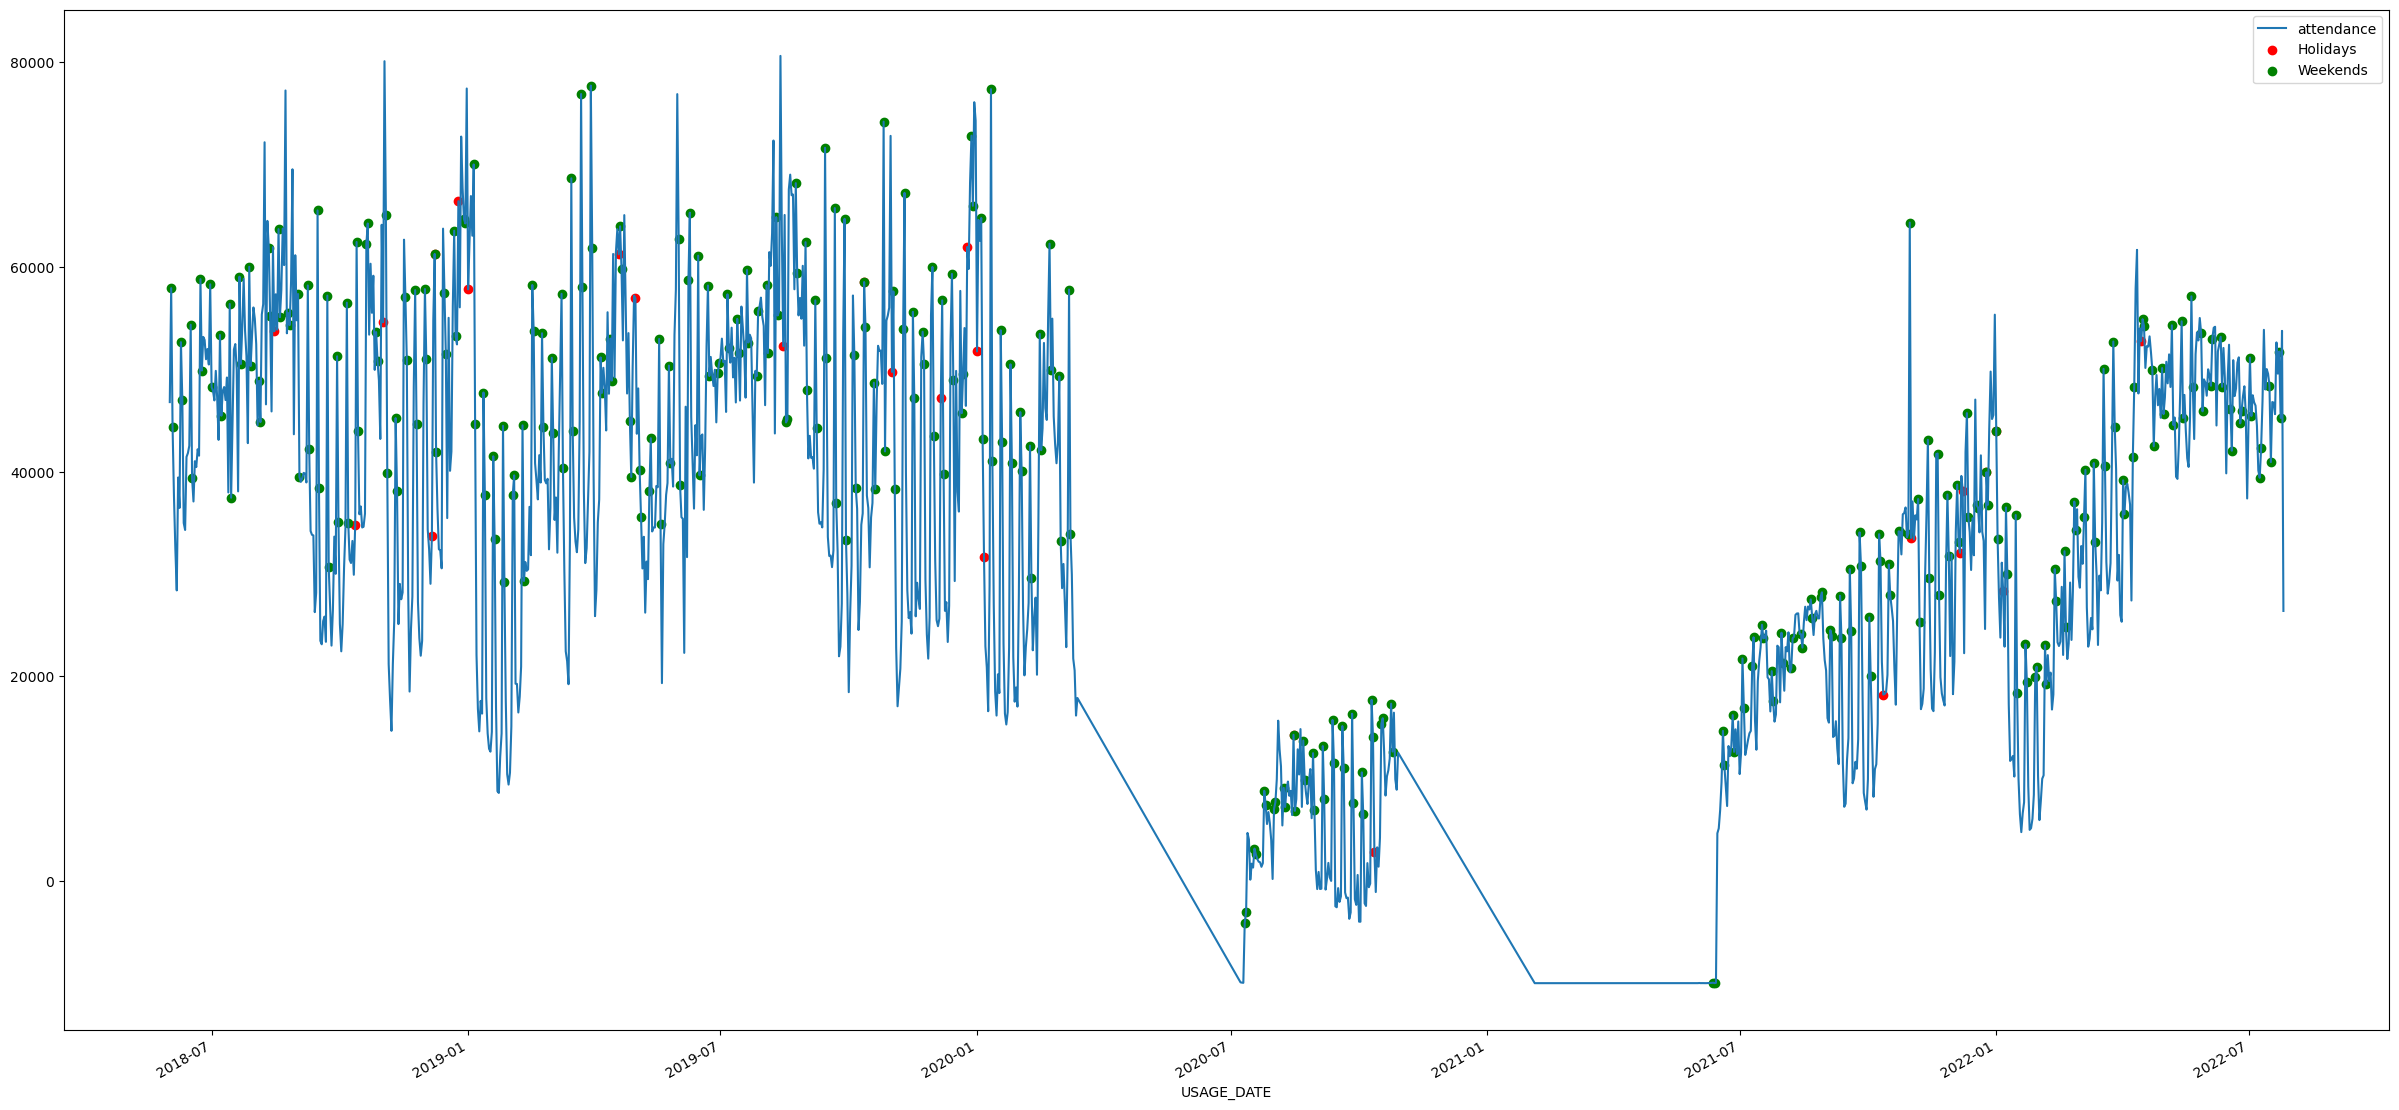

In [10]:
#plot the line of PortAventuraAttendanceDF ,x=USAGE_DATE, y=attendance
import matplotlib.pyplot as plt
PortAventuraAttendanceDF.plot(x='USAGE_DATE', y='attendance', kind='line',figsize=(30, 15))

# # Now, plot the holidays to red point in the line
holiday_dates = PortAventuraAttendanceDF[PortAventuraAttendanceDF['Holidays'] == 1]
plt.scatter(holiday_dates['USAGE_DATE'], holiday_dates['attendance'], color='red', label='Holidays')
plt.legend()

# # Now, plot the weekends to green point in the line
weekend_dates = PortAventuraAttendanceDF[PortAventuraAttendanceDF['Weekends'] == 1]
plt.scatter(weekend_dates['USAGE_DATE'], weekend_dates['attendance'], color='green', label='Weekends')
plt.legend()

plt.show()

Entity 

In [11]:
#rename the ENTITY_DESCRIPTION_SHORT to attraction 
entityDF.rename(columns={'ENTITY_DESCRIPTION_SHORT':'Attraction'}, inplace=True)
entityDF['WORK_DATE']=pd.to_datetime(entityDF['WORK_DATE'], format='%Y-%m-%d')

#select the Attraction colums that == PortAventura World
entity_port=entityDF[entityDF['Attraction']=='PortAventura World']

#select the Attraction colums that == to port_attraction_DF, othwerwise drop the row
entity_DF=entityDF[entityDF['Attraction'].isin(port_attraction_DF['ATTRACTION'])]

#merge the entity_port and entity_DF on attraction
entity_merge_DF=pd.concat([entity_port, entity_DF])

#sort the entity_merge_DF by date 
entity_merge_DF=entity_merge_DF.sort_values(by='WORK_DATE')

In [12]:
entity_merge_DF.head()

,REF_CLOSING_DESCRIPTION,Attraction,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
21180,NaN,Spiral Slide,ATTR,2018-01-01 08:30:00.000,2018-01-01 18:29:00.000,2018-01-02 07:53:26.000,2018-01-01
6310,NaN,Kiddie Coaster,ATTR,2018-01-01 10:00:00.000,2018-01-01 17:07:00.000,2018-01-02 07:51:31.000,2018-01-01
34217,NaN,Rapids Ride,ATTR,2018-01-01 09:29:00.000,2018-01-01 17:08:00.000,2018-01-02 07:51:31.000,2018-01-01
9678,NaN,PortAventura World,PARK,2018-01-01 10:00:00.000,2018-01-01 22:00:00.000,2018-01-02 07:57:06.000,2018-01-01
8237,NaN,Roller Coaster,ATTR,2018-01-01 10:00:00.000,2018-01-01 17:44:00.000,2018-01-02 07:46:01.000,2018-01-01


In [13]:
#add the holidays column to entity_merge_DF, if is holiday ==1, otherwise ==0
entity_merge_DF['Holidays']=entity_merge_DF['WORK_DATE'].isin(holidays_df['Date']).astype(int)
#add the weekends column to entity_merge_DF, if is weekend ==1, otherwise ==0
entity_merge_DF['Weekends']=entity_merge_DF['WORK_DATE'].dt.dayofweek.isin([5,6]).astype(int)

# #output the entity_merge_DF to entity_merge.csv
# entity_merge_DF.to_csv('entity_merge.csv',index=False)

#### Final merge: put the attendance & holidays/Weekends/Weekdays into waiting_time_df

In [14]:
base = pd.read_parquet('/Users/vivianwang/Downloads/OneDrive_1_2-19-2024/DataInMinute.parquet')
base1 = pd.read_parquet('/Users/vivianwang/Downloads/OneDrive_1_2-19-2024/DataInMinute.parquet')

In [15]:
base1.tail()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
3507135,2022-08-17,2022-08-17 09:00:00.000,9,2022-08-17 09:15:00.000,Monorail,5,11.0,23.5,29.8334,29.8333,...,4.02,NaN,NaN,NaN,NaN,100.0,804.0,Clouds,overcast clouds,04d
3507136,2022-08-17,2022-08-17 21:00:00.000,21,2022-08-17 21:15:00.000,Power Tower,5,17.0,10.0,93.7998,93.8000,...,1.75,NaN,NaN,NaN,NaN,99.0,804.0,Clouds,overcast clouds,04n
3507137,2022-08-17,2022-08-17 18:45:00.000,18,2022-08-17 19:00:00.000,Oz Theatre,0,2.0,0.0,0.0000,0.0000,...,0.98,NaN,NaN,NaN,NaN,100.0,804.0,Clouds,overcast clouds,04d
3507138,2022-08-17,2022-08-17 18:30:00.000,18,2022-08-17 18:45:00.000,Free Fall,0,1.0,0.0,0.0000,0.0000,...,0.98,NaN,NaN,NaN,NaN,100.0,804.0,Clouds,overcast clouds,04d
3507139,2022-08-17,2022-08-17 12:45:00.000,12,2022-08-17 13:00:00.000,Inverted Coaster,45,2.0,251.0,355.2500,355.2500,...,2.93,NaN,NaN,NaN,NaN,3.0,800.0,Clear,sky is clear,01d


In [16]:
entity_merge_DF['REF_CLOSING_DESCRIPTION'].fillna('DidNotClose',inplace = True)
def time_transform(x):
    p1 = int(x[11:13])
    p2 = float(x[14:16])/60
    return p1+p2
dummies = pd.get_dummies(entity_merge_DF.REF_CLOSING_DESCRIPTION)
entity_merge_DF.drop(columns = ['ENTITY_TYPE','UPDATE_TIME','REF_CLOSING_DESCRIPTION'],inplace = True)
entity_merge_DF['DEB_TIME_num'] = entity_merge_DF.DEB_TIME.apply(time_transform)
entity_merge_DF['FIN_TIME_num'] = entity_merge_DF.FIN_TIME.apply(time_transform)
entity_merge_DF['Duration'] = entity_merge_DF.FIN_TIME_num-entity_merge_DF.DEB_TIME_num
entity = pd.concat([dummies,entity_merge_DF],axis = 1)
PortAventuraAttendanceDF.rename(columns = {'USAGE_DATE':'WORK_DATE'},inplace = True)
PortAventuraAttendanceDF.drop(columns = ['FACILITY_NAME','Holidays','Weekends'], inplace = True)
daily = pd.merge(entity,PortAventuraAttendanceDF,on = 'WORK_DATE')

/var/folders/dp/4_t_qbl93db5chwk2q5m91540000gn/T/ipykernel_16013/1535085174.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PortAventuraAttendanceDF.rename(columns = {'USAGE_DATE':'WORK_DATE'},inplace = True)
/var/folders/dp/4_t_qbl93db5chwk2q5m91540000gn/T/ipykernel_16013/1535085174.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PortAventuraAttendanceDF.drop(columns = ['FACILITY_NAME','Holidays','Weekends'], inplace = True)


In [17]:
daily.set_index('WORK_DATE', inplace=True)
lag1 = daily.shift(1)
lag1 = lag1.dropna()
lag1.reset_index(inplace = True)
lag2 = daily.shift(2)
lag2 = lag2.dropna()
lag2.reset_index(inplace = True)
merged_df = pd.merge(lag1, lag2, on=['WORK_DATE', 'Attraction'], how='inner')
daily = pd.merge(daily,merged_df,  on=['WORK_DATE', 'Attraction'], how = 'inner')

In [18]:
daily.tail()

,WORK_DATE,DidNotClose,Fermeture Opérationnelle,Fermeture Réhab,Attraction,DEB_TIME,FIN_TIME,Holidays,Weekends,DEB_TIME_num,...,Fermeture Opérationnelle_y,Fermeture Réhab_y,DEB_TIME_y,FIN_TIME_y,Holidays_y,Weekends_y,DEB_TIME_num_y,FIN_TIME_num_y,Duration_y,attendance_y
26420,2022-07-26,1,0,0,Giant Wheel,2022-07-26 08:30:00.000,2022-07-26 23:16:00.000,0,0,8.500000,...,0.0,0.0,2022-07-26 08:30:00.000,2022-07-26 23:16:00.000,0.0,0.0,8.500000,23.266667,14.766667,26391.0
26421,2022-07-26,1,0,0,Drop Tower,2022-07-26 08:30:00.000,2022-07-26 22:18:00.000,0,0,8.500000,...,0.0,0.0,2022-07-26 08:30:00.000,2022-07-26 22:18:00.000,0.0,0.0,8.500000,22.300000,13.800000,26391.0
26422,2022-07-26,1,0,0,Haunted House,2022-07-26 09:30:00.000,2022-07-26 21:57:00.000,0,0,9.500000,...,0.0,0.0,2022-07-26 09:30:00.000,2022-07-26 21:57:00.000,0.0,0.0,9.500000,21.950000,12.450000,26391.0
26423,2022-07-26,0,0,1,Himalaya Ride,2022-07-26 23:59:00.000,2022-07-26 23:59:00.000,0,0,23.983333,...,0.0,1.0,2022-07-26 23:59:00.000,2022-07-26 23:59:00.000,0.0,0.0,23.983333,23.983333,0.000000,26391.0
26424,2022-07-26,1,0,0,Swing Ride,2022-07-26 08:30:00.000,2022-07-26 22:26:00.000,0,0,8.500000,...,0.0,0.0,2022-07-26 08:30:00.000,2022-07-26 22:26:00.000,0.0,0.0,8.500000,22.433333,13.933333,26391.0


In [19]:
base.drop(columns = ['FIN_TIME','dt','dt_iso','timezone','lat','lon','visibility','sea_level','grnd_level','city_name'],inplace = True)
base.fillna(0,inplace = True)
dummies = pd.get_dummies(base[['weather_main','weather_description','weather_icon']])
base.drop(columns = ['weather_main','weather_description','weather_icon'],inplace = True)
base = pd.concat([base,dummies],axis = 1)
base.rename(columns = {'ENTITY_DESCRIPTION_SHORT':'Attraction','DEB_TIME':'START_TIME'},inplace = True)

In [20]:
# Convert 'WORK_DATE' to datetime if necessary
base['WORK_DATE'] = pd.to_datetime(base['WORK_DATE'])
daily['WORK_DATE'] = pd.to_datetime(daily['WORK_DATE'])

# Convert 'Attraction' to string if necessary
base['Attraction'] = base['Attraction'].astype(str)
daily['Attraction'] = daily['Attraction'].astype(str)


In [21]:
base = pd.merge(base,daily,  on=['WORK_DATE', 'Attraction'], how = 'inner')
base['is_open'] = base.apply(lambda row: 1 if row['DEB_TIME'] <= row['START_TIME'] <= row['FIN_TIME'] else 0, axis=1)

In [22]:
base.tail()

,WORK_DATE,START_TIME,DEB_TIME_HOUR,Attraction,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,...,Fermeture Réhab_y,DEB_TIME_y,FIN_TIME_y,Holidays_y,Weekends_y,DEB_TIME_num_y,FIN_TIME_num_y,Duration_y,attendance_y,is_open
1127419,2022-07-26,2022-07-26 10:00:00.000,10,Crazy Dance,0,0.0,0.0,0.0,0.0,0,...,1.0,2022-07-26 23:59:00.000,2022-07-26 23:59:00.000,0.0,0.0,23.983333,23.983333,0.0,26391.0,0
1127420,2022-07-26,2022-07-26 14:15:00.000,14,Crazy Dance,0,0.0,0.0,0.0,0.0,0,...,1.0,2022-07-26 23:59:00.000,2022-07-26 23:59:00.000,0.0,0.0,23.983333,23.983333,0.0,26391.0,0
1127421,2022-07-26,2022-07-26 19:15:00.000,19,Crazy Dance,0,0.0,0.0,0.0,0.0,0,...,1.0,2022-07-26 23:59:00.000,2022-07-26 23:59:00.000,0.0,0.0,23.983333,23.983333,0.0,26391.0,0
1127422,2022-07-26,2022-07-26 21:00:00.000,21,Crazy Dance,0,0.0,0.0,0.0,0.0,0,...,1.0,2022-07-26 23:59:00.000,2022-07-26 23:59:00.000,0.0,0.0,23.983333,23.983333,0.0,26391.0,0
1127423,2022-07-26,2022-07-26 12:45:00.000,12,Crazy Dance,0,0.0,0.0,0.0,0.0,0,...,1.0,2022-07-26 23:59:00.000,2022-07-26 23:59:00.000,0.0,0.0,23.983333,23.983333,0.0,26391.0,0


# Data Visulization

In [23]:
#vectorize entity_merge_DF['Attraction'] to a new column
entity_merge_DF['Attraction'] = pd.Categorical(entity_merge_DF['Attraction'])
entity_merge_DF['Attraction'] = entity_merge_DF['Attraction'].cat.codes

/var/folders/dp/4_t_qbl93db5chwk2q5m91540000gn/T/ipykernel_16013/2704475473.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(entity_merge_DF.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


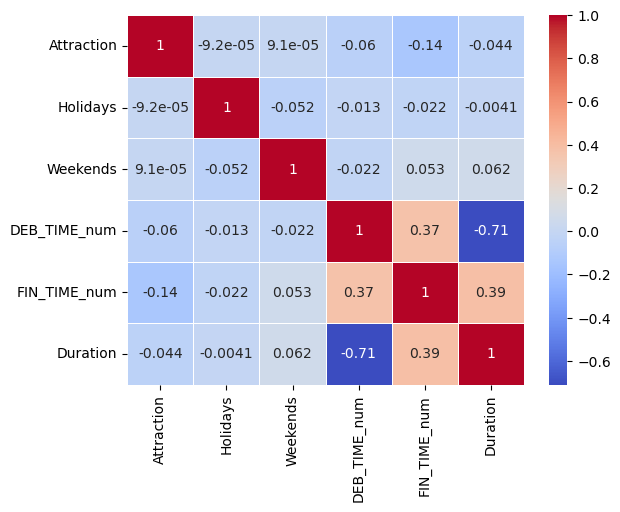

In [24]:
#plot the correlation matrix of entity_merge_DF
import seaborn as sns
sns.heatmap(entity_merge_DF.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


/var/folders/dp/4_t_qbl93db5chwk2q5m91540000gn/T/ipykernel_16013/3615534025.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

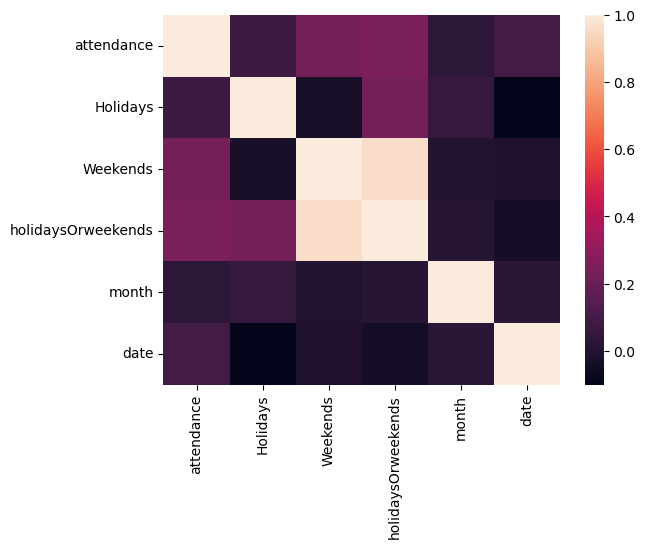

In [25]:
df = pd.read_csv('PortAventuraAttendance.csv')
df['holidaysOrweekends'] = df.Holidays+df.Weekends
df.holidaysOrweekends = df.holidaysOrweekends.apply(lambda x:min(x,1))
df['month'] = df.USAGE_DATE.apply(lambda x:int(x[5:7]))
df['date'] = df.USAGE_DATE.apply(lambda x:int(x[-2:]))
sns.heatmap(df.corr())

In [26]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['attendance'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] > 0.05:
    print("time series is NOT stationary")
else:
    print("time series is stationary")

ADF Statistic: -3.245327
p-value: 0.017506
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
time series is stationary


In [27]:
import pandas as pd
df['lag_1'] = df['attendance'].shift(1)  # 昨天的值
df['lag_2'] = df['attendance'].shift(2)  # 前天的值

# 创建滑动窗口统计量
window_size = 7  # 7天的窗口
df['rolling_mean'] = df['attendance'].rolling(window=window_size).mean()  # 7天平均值
df['rolling_max'] = df['attendance'].rolling(window=window_size).max()    # 7天最大值

<Axes: >

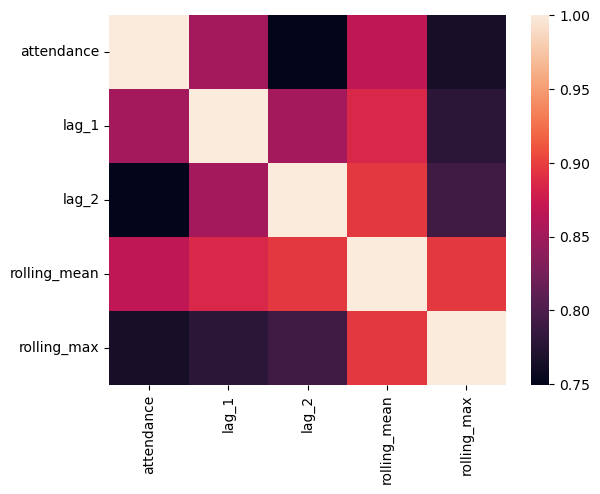

In [28]:
sns.heatmap(df[['attendance','lag_1','lag_2','rolling_mean','rolling_max']].corr())

# Drop the Covid period

In [29]:
mins_data=base.copy()
#only keep the work_time before Feb 01 2020 and after July 31 2021
mins_data1=mins_data[mins_data['WORK_DATE']<'2020-02-01']
mins_data2=mins_data[mins_data['WORK_DATE']>'2021-07-31']
mins_data_final=pd.concat([mins_data1,mins_data2])

# #export the mins_data to a parquet file
# mins_data.to_parquet('mins_data.parquet')

In [30]:
mins_data_final

,WORK_DATE,START_TIME,DEB_TIME_HOUR,Attraction,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,...,Fermeture Réhab_y,DEB_TIME_y,FIN_TIME_y,Holidays_y,Weekends_y,DEB_TIME_num_y,FIN_TIME_num_y,Duration_y,attendance_y,is_open
0,2018-06-01,2018-06-01 19:00:00.000,19,Roller Coaster,15,2.0,50.0,75.0,75.0,15,...,0.0,2018-06-01 10:00:00.000,2018-06-01 19:46:00.000,0.0,0.0,10.000000,19.766667,9.766667,46804.0,1
1,2018-06-01,2018-06-01 17:30:00.000,17,Roller Coaster,10,2.0,27.0,75.0,75.0,15,...,0.0,2018-06-01 10:00:00.000,2018-06-01 19:46:00.000,0.0,0.0,10.000000,19.766667,9.766667,46804.0,1
2,2018-06-01,2018-06-01 16:15:00.000,16,Roller Coaster,20,2.0,38.0,75.0,75.0,15,...,0.0,2018-06-01 10:00:00.000,2018-06-01 19:46:00.000,0.0,0.0,10.000000,19.766667,9.766667,46804.0,1
3,2018-06-01,2018-06-01 20:30:00.000,20,Roller Coaster,0,2.0,0.0,0.0,0.0,0,...,0.0,2018-06-01 10:00:00.000,2018-06-01 19:46:00.000,0.0,0.0,10.000000,19.766667,9.766667,46804.0,0
4,2018-06-01,2018-06-01 15:15:00.000,15,Roller Coaster,20,2.0,41.0,75.0,75.0,15,...,0.0,2018-06-01 10:00:00.000,2018-06-01 19:46:00.000,0.0,0.0,10.000000,19.766667,9.766667,46804.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127419,2022-07-26,2022-07-26 10:00:00.000,10,Crazy Dance,0,0.0,0.0,0.0,0.0,0,...,1.0,2022-07-26 23:59:00.000,2022-07-26 23:59:00.000,0.0,0.0,23.983333,23.983333,0.000000,26391.0,0
1127420,2022-07-26,2022-07-26 14:15:00.000,14,Crazy Dance,0,0.0,0.0,0.0,0.0,0,...,1.0,2022-07-26 23:59:00.000,2022-07-26 23:59:00.000,0.0,0.0,23.983333,23.983333,0.000000,26391.0,0
1127421,2022-07-26,2022-07-26 19:15:00.000,19,Crazy Dance,0,0.0,0.0,0.0,0.0,0,...,1.0,2022-07-26 23:59:00.000,2022-07-26 23:59:00.000,0.0,0.0,23.983333,23.983333,0.000000,26391.0,0
1127422,2022-07-26,2022-07-26 21:00:00.000,21,Crazy Dance,0,0.0,0.0,0.0,0.0,0,...,1.0,2022-07-26 23:59:00.000,2022-07-26 23:59:00.000,0.0,0.0,23.983333,23.983333,0.000000,26391.0,0


In [31]:
#print all the columns name in mins_data_final
print(mins_data_final.columns)


Index(['WORK_DATE', 'START_TIME', 'DEB_TIME_HOUR', 'Attraction',
       'WAIT_TIME_MAX', 'NB_UNITS', 'GUEST_CARRIED', 'CAPACITY',
       'ADJUST_CAPACITY', 'OPEN_TIME', 'UP_TIME', 'DOWNTIME', 'NB_MAX_UNIT',
       'temp', 'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h',
       'snow_1h', 'snow_3h', 'clouds_all', 'weather_id', 'weather_main_Clear',
       'weather_main_Clouds', 'weather_main_Rain', 'weather_main_Snow',
       'weather_description_broken clouds', 'weather_description_few clouds',
       'weather_description_heavy intensity rain',
       'weather_description_light rain', 'weather_description_light snow',
       'weather_description_moderate rain',
       'weather_description_overcast clouds',
       'weather_description_scattered clouds',
       'weather_description_sky is clear', 'weather_description_snow',
       'weather_icon_01d', 'weather_icon_01n', 'weather_icon_02d',
     

# Buliding models

### XgBoost(Victor)

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from datetime import timedelta
from sklearn.model_selection import GridSearchCV

In [33]:
# Read the Parquet file
df = pd.read_parquet("DataInMinute.parquet", engine='pyarrow')  # You can also use engine='fastparquet'
df_nocov = pd.read_parquet("mins_data.parquet", engine='pyarrow')  # You can also use engine='fastparquet'

In [34]:
attractions = ['Roller Coaster', 'Bumper Cars', 'Rapids Ride', 'Crazy Dance',
       'Skyway', 'Free Fall', 'Monorail', 'Swing Ride', 'Crazy Bus',
       'Drop Tower', 'Spinning Coaster', 'Scooby Doo', 'Superman Ride',
       'Spiral Slide', 'Inverted Coaster', 'Water Ride', 'Power Tower',
       'Top Spin', 'Log Flume', 'Oz Theatre', 'Circus Train',
       'Giant Wheel', 'Kiddie Coaster', 'Bungee Jump', 'Zipline',
       'Aeroplane Ride', 'Haunted House', 'Reverse Bungee', 'Go-Karts',
       'Dizzy Dropper', 'Merry Go Round', 'Flying Coaster', 'Gondola',
       'Pirate Ship', 'Giga Coaster', 'Himalaya Ride', 'Sling Shot',
       'Vertical Drop', 'Tilt-A-Whirl']
attractions2 = ['Roller Coaster', 'Bumper Cars']

In [35]:
# Assuming your dataframe is named df
df['WORK_DATE'] = pd.to_datetime(df['WORK_DATE'])
df['DEB_TIME'] = pd.to_datetime(df['DEB_TIME'])
df['FIN_TIME'] = pd.to_datetime(df['FIN_TIME'])

# Sort the dataframe by WORK_DATE to ensure correct lag calculation
df.sort_values(by='DEB_TIME', inplace=True)

# Adding day of the week as a feature
df['day_of_week'] = df['WORK_DATE'].dt.dayofweek

# Assuming your dataframe is named df
df_nocov['WORK_DATE'] = pd.to_datetime(df_nocov['WORK_DATE'])
df_nocov['DEB_TIME'] = pd.to_datetime(df_nocov['DEB_TIME'])
df_nocov['FIN_TIME'] = pd.to_datetime(df_nocov['FIN_TIME'])

# Sort the dataframe by WORK_DATE to ensure correct lag calculation
df_nocov.sort_values(by='DEB_TIME', inplace=True)

# Adding day of the week as a feature
df_nocov['day_of_week'] = df_nocov['WORK_DATE'].dt.dayofweek

In [36]:
max_date_nocov = df_nocov['DEB_TIME'].max()

df_new = df[df['DEB_TIME'] <= max_date_nocov]

columns_to_drop = ['DEB_TIME', 'FIN_TIME', 'city_name', 'dt_iso', 'weather_icon', 'visibility', 'sea_level', 'grnd_level', 'snow_3h']
df_new = df_new.drop(columns=columns_to_drop)
df_new = pd.get_dummies(df_new, columns=['weather_main', 'weather_description'])

columns_to_fill = ['wind_gust', 'rain_1h', 'rain_3h', 'snow_1h']
df_new[columns_to_fill] = df_new[columns_to_fill].fillna(0)

one_hot_encoded_entity = pd.get_dummies(df_new['ENTITY_DESCRIPTION_SHORT'])
one_hot_encoded_entity['WORK_DATE'] = df_new['WORK_DATE']

validation_start_date = df_new['WORK_DATE'].max() - timedelta(weeks=2)
train_df = df_new[df_new['WORK_DATE'] < validation_start_date]
validation_df = df_new[df_new['WORK_DATE'] >= validation_start_date]

one_hot_encoded_entity_train = one_hot_encoded_entity[one_hot_encoded_entity['WORK_DATE'] < validation_start_date]
one_hot_encoded_entity_test = one_hot_encoded_entity[one_hot_encoded_entity['WORK_DATE'] >= validation_start_date]

one_hot_encoded_entity_train = one_hot_encoded_entity_train.drop(columns=['WORK_DATE'])
one_hot_encoded_entity_test = one_hot_encoded_entity_test.drop(columns=['WORK_DATE'])

train_df = train_df.drop(columns=['WORK_DATE'])
validation_df = validation_df.drop(columns=['WORK_DATE'])

In [37]:
columns_to_drop_nocov = ['DEB_TIME', 'FIN_TIME', 'snow_3h', 'START_TIME', 'DEB_TIME_x', 'FIN_TIME_x', 'DEB_TIME_y', 'FIN_TIME_y']

df_nocov_new = df_nocov.drop(columns=columns_to_drop_nocov)

df_nocov_new[columns_to_fill] = df_nocov_new[columns_to_fill].fillna(0)

one_hot_encoded_entity_nocov = pd.get_dummies(df_nocov_new['Attraction'])
one_hot_encoded_entity_nocov['WORK_DATE'] = df_nocov_new['WORK_DATE']

validation_start_date = df_nocov_new['WORK_DATE'].max() - timedelta(weeks=2)
train_df_nocov = df_nocov_new[df_nocov_new['WORK_DATE'] < validation_start_date]
validation_df_nocov = df_nocov_new[df_nocov_new['WORK_DATE'] >= validation_start_date]

one_hot_encoded_entity_train_nocov = one_hot_encoded_entity_nocov[one_hot_encoded_entity_nocov['WORK_DATE'] < validation_start_date]
one_hot_encoded_entity_test_nocov  = one_hot_encoded_entity_nocov[one_hot_encoded_entity_nocov['WORK_DATE'] >= validation_start_date]

one_hot_encoded_entity_train_nocov = one_hot_encoded_entity_train_nocov.drop(columns=['WORK_DATE'])
one_hot_encoded_entity_test_nocov = one_hot_encoded_entity_test_nocov.drop(columns=['WORK_DATE'])

train_df_nocov = train_df_nocov.drop(columns=['WORK_DATE'])
validation_df_nocov = validation_df_nocov.drop(columns=['WORK_DATE'])

## Data Modelling

In [38]:
train_df_mod = pd.concat([train_df, one_hot_encoded_entity_train], axis=1)
validation_df_mod = pd.concat([validation_df, one_hot_encoded_entity_test], axis=1)

X_train = train_df_mod.drop(columns=['ENTITY_DESCRIPTION_SHORT', 'WAIT_TIME_MAX'])
y_train = train_df_mod['WAIT_TIME_MAX']

X_test = validation_df_mod.drop(columns=['ENTITY_DESCRIPTION_SHORT', 'WAIT_TIME_MAX'])
y_test = validation_df_mod['WAIT_TIME_MAX']

model = XGBRegressor(tree_method='hist') #, device="cuda"
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE for all rides: {rmse}")
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Average Percentage Error : {mape}%")

RMSE for all rides: 12.575517241113223
Mean Average Percentage Error : 3720066636441617.5%


In [39]:
train_df_mod = pd.concat([train_df_nocov, one_hot_encoded_entity_train_nocov], axis=1)
validation_df_mod = pd.concat([validation_df_nocov, one_hot_encoded_entity_test_nocov], axis=1)

X_train = train_df_mod.drop(columns=['Attraction', 'WAIT_TIME_MAX'])
y_train = train_df_mod['WAIT_TIME_MAX']

X_test = validation_df_mod.drop(columns=['Attraction', 'WAIT_TIME_MAX'])
y_test = validation_df_mod['WAIT_TIME_MAX']

model = XGBRegressor(tree_method='hist', device="cuda")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE for all rides: {rmse}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Average Percentage Error : {mape}%")

[18:12:36] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "device" } are not used.

RMSE for all rides: 11.472949632601308
Mean Average Percentage Error : 3745963566640265.5%


In [40]:
train_df_mod = pd.concat([train_df_nocov, one_hot_encoded_entity_train_nocov], axis=1)
validation_df_mod = pd.concat([validation_df_nocov, one_hot_encoded_entity_test_nocov], axis=1)

X_train = train_df_mod.drop(columns=['Attraction', 'WAIT_TIME_MAX'])
y_train = train_df_mod['WAIT_TIME_MAX']

X_test = validation_df_mod.drop(columns=['Attraction', 'WAIT_TIME_MAX'])
y_test = validation_df_mod['WAIT_TIME_MAX']

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 6, 12],         # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2] # Step size shrinkage used in update to prevent overfitting
}

# Initialize the XGBRegressor with fixed parameters
model = XGBRegressor(tree_method='hist')  # Use 'gpu' if your setup supports it, else use 'auto'

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='neg_root_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE for all rides: {rmse}")

# Calculate and print the MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Average Percentage Error: {mape}%")

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   6.7s


KeyboardInterrupt: 

In [ ]:
#use the best parameters to train the model
best_model = XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.1, tree_method='hist')
best_model.fit(X_train, y_train)

#make the prediction
y_pred = best_model.predict(X_test)

# Calculate and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE for all rides: {rmse}")

RMSE for all rides: 11.107414296935552


### Markov Chain(Zihao)

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import random
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
to_generate_data = False
to_train = False
to_test = True

In [ ]:
if to_generate_data:
    df = pd.read_parquet('autodl-tmp/mins_data.parquet')
    df.sort_values(by=['START_TIME', 'Attraction'], inplace=True)
    df['lag1'] = df.groupby('Attraction')['WAIT_TIME_MAX'].shift(1).fillna(0)
    df['lag2'] = df.groupby('Attraction')['WAIT_TIME_MAX'].shift(2).fillna(0)
    df.reset_index(inplace = True,drop = True)
    one_hot_columns = [col for col in df.columns if 
                       pd.api.types.is_numeric_dtype(df[col]) and 
                       sorted(df[col].unique()) == [0, 1]]
    non_one_hot_columns = [col for col in df.columns if 
                           pd.api.types.is_numeric_dtype(df[col]) and 
                           col not in one_hot_columns and col not in ['lag1','lag2','WAIT_TIME_MAX']]
    scaler = StandardScaler()
    df[non_one_hot_columns] = scaler.fit_transform(df[non_one_hot_columns])
    
    num_attractions = len(df.Attraction.unique())
    grouped = df.groupby('START_TIME')
    feature_columns = [i for i in list(df) if i not in ['WORK_DATE',
     'START_TIME',
     'Attraction',
     'WAIT_TIME_MAX',
     'DEB_TIME',
     'FIN_TIME',
     'DEB_TIME_x',
     'FIN_TIME_x',
     'DEB_TIME_y',
     'FIN_TIME_y']]
    zero_data = np.zeros((1, len(feature_columns)))
    zero_df = pd.DataFrame(zero_data, columns=feature_columns)
    processed_groups = []
    targets = []
    all_attractions = sorted(df['Attraction'].unique())
    for time_point, group in tqdm(grouped):
        processed_group = group.copy()
        processed_group = processed_group.drop_duplicates(subset=['Attraction'], keep='first')
        present_attractions = group['Attraction'].unique()
        missing_attractions = set(all_attractions) - set(present_attractions)
        for attraction in missing_attractions:
            temp_df = zero_df.copy()
            temp_df['Attraction'] = attraction
            temp_df['START_TIME'] = time_point
            processed_group = pd.concat([processed_group, temp_df], ignore_index=True)
        processed_group.sort_values(by=['Attraction'], inplace=True)
        t = processed_group.pop('WAIT_TIME_MAX').fillna(0)
        data = torch.tensor(processed_group[feature_columns].values, dtype=torch.float)
        processed_groups.append(data)
        targets.append(t)
        if data.shape[0] != 26:
            break
    features_tensor = torch.stack(processed_groups)
    labels_tensor = torch.tensor(np.array(targets))
    total_samples = len(features_tensor)
    # last 10% for validation
    split_idx = int(total_samples * 0.9)
    
    train_features = features_tensor[:split_idx]
    train_labels = labels_tensor[:split_idx]
    validation_features = features_tensor[split_idx:]
    validation_labels = labels_tensor[split_idx:]
    
    train_dataset = TensorDataset(train_features, train_labels)
    validation_dataset = TensorDataset(validation_features, validation_labels)
    torch.save(train_dataset, 'autodl-tmp/train_dataset.pth')
    torch.save(validation_dataset, 'autodl-tmp/validation_dataset.pth')
else:
    df = pd.read_parquet('autodl-tmp/mins_data.parquet')
    df.sort_values(by=['START_TIME', 'Attraction'], inplace=True)
    df['lag1'] = df.groupby('Attraction')['WAIT_TIME_MAX'].shift(1).fillna(0)
    df['lag2'] = df.groupby('Attraction')['WAIT_TIME_MAX'].shift(2).fillna(0)
    df.reset_index(inplace = True,drop = True)
    one_hot_columns = [col for col in df.columns if 
                       pd.api.types.is_numeric_dtype(df[col]) and 
                       sorted(df[col].unique()) == [0, 1]]
    non_one_hot_columns = [col for col in df.columns if 
                           pd.api.types.is_numeric_dtype(df[col]) and 
                           col not in one_hot_columns and col not in ['lag1','lag2','WAIT_TIME_MAX']]
    scaler = StandardScaler()
    df[non_one_hot_columns] = scaler.fit_transform(df[non_one_hot_columns])
    
    num_attractions = len(df.Attraction.unique())
    grouped = df.groupby('START_TIME')
    feature_columns = [i for i in list(df) if i not in ['WORK_DATE',
     'START_TIME',
     'Attraction',
     'WAIT_TIME_MAX',
     'DEB_TIME',
     'FIN_TIME',
     'DEB_TIME_x',
     'FIN_TIME_x',
     'DEB_TIME_y',
     'FIN_TIME_y']]
    train_dataset = torch.load('autodl-tmp/train_dataset.pth')
    validation_dataset = torch.load('autodl-tmp/validation_dataset.pth')
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=1, shuffle=False)

In [ ]:
class Network1(nn.Module):
    def __init__(self, input_size, output_size, num_layers=1):
        super(Network1, self).__init__()
        self.fc1 = nn.Linear(input_size, 1500)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1500, 1000)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(1000, output_size)
        self.relu = nn.LeakyReLU()
        init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')
        init.kaiming_normal_(self.fc3.weight, nonlinearity='leaky_relu')
    def forward(self, x, return_intermediate=False):
        intermediate_outputs = {}
        out = self.relu(self.fc1(x))
        intermediate_outputs['fc1'] = out
        out = self.dropout1(out)
        intermediate_outputs['dropout1'] = out
        out = self.relu(self.fc2(out))
        intermediate_outputs['fc2'] = out
        out = self.dropout2(out)
        intermediate_outputs['dropout2'] = out
        out = self.fc3(out)
        intermediate_outputs['fc3'] = out
        
        if return_intermediate:
            return intermediate_outputs
        else:
            return out

class Network2(nn.Module):
    def __init__(self,input_size,output_size):
        super(Network2, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256,128)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(128, output_size)
        self.relu = nn.LeakyReLU()
        init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')
        init.kaiming_normal_(self.fc3.weight, nonlinearity='leaky_relu')
        init.kaiming_normal_(self.fc4.weight, nonlinearity='leaky_relu')
    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.dropout1(out)
        out = self.relu(self.fc2(out))
        out = self.dropout2(out)
        out = self.relu(self.fc3(out))
        out = self.dropout3(out)
        out = self.fc4(out)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
network1 = Network1(input_size=num_attractions*len(feature_columns),
                    output_size=num_attractions*num_attractions).to(device)
network2 = Network2(input_size=num_attractions, output_size=num_attractions).to(device)


In [ ]:
def build_initial_matrix(out):
    matrix = out.view(26, 26)
    normalized_matrix = matrix / matrix.sum(dim=1, keepdim=True)
    return normalized_matrix
def calculate_stationary_matrix(matrix, num_iterations=30, epsilon=1e-6):
    v = torch.ones(matrix.size(0), dtype=matrix.dtype, device=matrix.device)
    v = v / v.sum()
    for _ in range(num_iterations):
        v_next = torch.mv(matrix, v)
        v_next = v_next / v_next.sum()
        if torch.norm(v - v_next) < epsilon:
            break
        v = v_next
    return v
def Middle(out):
    return calculate_stationary_matrix(build_initial_matrix(out))

In [ ]:
criterion = nn.MSELoss()
optimizer1 = optim.Adam(network1.parameters(), lr=0.001)
optimizer2 = optim.Adam(network2.parameters(), lr=0.001)

In [ ]:
def validate(model1, model2, validation_loader, criterion, device):
    model1.eval() 
    model2.eval()
    val_loss = 0.0
    with torch.no_grad(): 
        for inputs, targets in validation_loader:
            inputs = inputs.reshape((1,num_attractions*len(feature_columns))).float()
            inputs, targets = inputs.to(device), targets.float().to(device)
            out1 = model1(inputs)
            intermediate_matrix = build_initial_matrix(out1)
            stationary_matrix = calculate_stationary_matrix(intermediate_matrix)
            predictions = model2(stationary_matrix)
            loss = criterion(predictions, targets)
            val_loss += loss.item()
    return np.sqrt(val_loss / len(validation_loader))
def RMSE_for_Attraction(network1,network2):
    attraction = df.Attraction.unique()
    attraction.sort()
    network1.eval() 
    network2.eval()
    result = pd.DataFrame({'attraction':attraction,'RMSE':[0 for i in attraction]})
    val_loss = 0.0
    with torch.no_grad(): 
        for inputs, targets in tqdm(validation_loader):
            targets = targets.reshape(26)
            inputs = inputs.reshape((1,num_attractions*len(feature_columns))).float()
            inputs, targets = inputs.to(device), targets.float().to(device)
            out1 = network1(inputs)
            intermediate_matrix = build_initial_matrix(out1)
            stationary_matrix = calculate_stationary_matrix(intermediate_matrix)
            predictions = network2(stationary_matrix)
            for i in range(len(predictions)):
                index = result['attraction'] == attraction[i]
                result.loc[index, 'RMSE'] += float((targets[i] - predictions[i]))**2
    result.RMSE = result.RMSE/len(validation_loader)
    result.RMSE = result.RMSE.apply(lambda x:np.sqrt(x))
    return result

In [ ]:
if to_train:
    num_epochs = 10
    current_best = 1e10
    RMSE_val = []
    for epoch in range(num_epochs):
        network1.train()
        network2.train()
        train_loss = 0.0
        pbar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}")
        for batch_idx, (inputs, targets) in pbar:
            inputs = inputs.reshape((1,num_attractions*len(feature_columns))).float()
            inputs, targets = inputs.to(device), targets.float().to(device)
            optimizer1.zero_grad()
            optimizer2.zero_grad()
            out1 = network1(inputs)
            stationary_matrix = Middle(out1)
            predictions = network2(stationary_matrix).reshape((1,26)).float()
            loss = criterion(predictions, targets)
            loss.backward()
            clip_value = 1 #1-10
            nn.utils.clip_grad_norm_(network1.parameters(), clip_value) 
            nn.utils.clip_grad_norm_(network2.parameters(), clip_value)
            optimizer1.step()
            optimizer2.step()
            train_loss += loss.item()
            pbar.set_postfix({'Train Loss': train_loss / (batch_idx + 1)})
            
        val_loss = validate(network1, network2, validation_loader, criterion, device)
        RMSE_val.append(val_loss)
        if np.sqrt(val_loss) < current_best:
            torch.save(network1, 'network1_v1.pth')
            torch.save(network2, 'network2_v1.pth')
            current_best = val_loss
        print(f"Validation Loss: {val_loss:.4f}")

In [ ]:
if to_test:
    best_network1 = torch.load('network1_v1.pth')
    best_network2 = torch.load('network2_v1.pth')
    result = RMSE_for_Attraction(best_network1,best_network2)
    print('RMSE for all Attractions', result.RMSE.mean())
    print(result)

### LightBGM(Vivian)

In [41]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [42]:
# Convert datetime columns to numerical features
data=mins_data_final.copy()
data['WORK_DATE'] = data['WORK_DATE'].astype('int64') // 10**9  # Convert to timestamp

# Convert object columns that are categorical to integer labels
for col in ['Attraction']:
    le = preprocessing.LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [43]:
#make a dataframe that contains the corresponding encoded attraction and the original attraction
attraction_mapping = pd.DataFrame()
attraction_mapping['Attraction'] = le.classes_
attraction_mapping['Encoded Attraction'] = le.transform(le.classes_)
attraction_mapping

,Attraction,Encoded Attraction
0,Bumper Cars,0
1,Bungee Jump,1
2,Circus Train,2
3,Crazy Dance,3
4,Dizzy Dropper,4
5,Drop Tower,5
6,Flying Coaster,6
7,Free Fall,7
8,Giant Wheel,8
9,Giga Coaster,9


In [44]:
#order the data by START_TIME and pick the last 10% as the test data
data = data.sort_values(by='START_TIME')

# Drop the unnecessary time object columns
columns_to_drop = ['START_TIME', 'DEB_TIME', 'FIN_TIME', 'DEB_TIME_x', 'FIN_TIME_x', 'DEB_TIME_y', 'FIN_TIME_y']
data.drop(columns=columns_to_drop, inplace=True)

X = data.drop('WAIT_TIME_MAX', axis=1)
y = data['WAIT_TIME_MAX']

X_train = X.iloc[:int(0.9*len(X))]
X_test = X.iloc[int(0.9*len(X)):]
y_train = y.iloc[:int(0.9*len(y))]
y_test = y.iloc[int(0.9*len(y)):]

In [50]:
X_test

,WORK_DATE,DEB_TIME_HOUR,Attraction,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,...,DidNotClose_y,Fermeture Opérationnelle_y,Fermeture Réhab_y,Holidays_y,Weekends_y,DEB_TIME_num_y,FIN_TIME_num_y,Duration_y,attendance_y,is_open
1020018,1652486400,11,10,4.0,327.0,450.50,450.50,15,15,0,...,1.0,0.0,0.0,0.0,1.0,8.500000,23.300000,14.800000,54698.0,1
1020181,1652486400,11,21,3.0,144.0,243.75,243.75,15,15,0,...,1.0,0.0,0.0,0.0,1.0,9.500000,17.450000,7.950000,54698.0,1
1018794,1652486400,11,16,2.0,0.0,0.00,0.00,0,0,0,...,1.0,0.0,0.0,0.0,1.0,12.000000,17.316667,5.316667,54698.0,0
1020231,1652486400,11,25,12.0,69.0,101.25,101.25,15,15,0,...,1.0,0.0,0.0,0.0,1.0,8.500000,23.100000,14.600000,54698.0,1
1019954,1652486400,11,3,0.0,0.0,0.00,0.00,0,0,0,...,0.0,0.0,1.0,0.0,1.0,23.983333,23.983333,0.000000,54698.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126889,1658793600,22,2,1.0,0.0,0.00,0.00,0,0,0,...,1.0,0.0,0.0,0.0,0.0,9.500000,21.816667,12.316667,26391.0,0
1126115,1658793600,22,4,88.0,0.0,0.00,0.00,0,0,0,...,1.0,0.0,0.0,0.0,0.0,8.500000,22.250000,13.750000,26391.0,0
1126114,1658793600,22,4,88.0,0.0,0.00,0.00,0,0,0,...,1.0,0.0,0.0,0.0,0.0,8.500000,22.216667,13.716667,53764.0,0
1126206,1658793600,22,17,2.0,0.0,0.00,0.00,0,0,0,...,1.0,0.0,0.0,0.0,0.0,10.316667,21.200000,10.883333,26391.0,0


In [45]:
import lightgbm as lgb

# Create a LightGBM dataset from the training data
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature='auto')

# Define parameters (adjust depending on your needs)
params = {
    'objective': 'regression',  
    'metric': 'l2',  
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the model
gbm = lgb.train(params, train_data, num_boost_round=100)

#prediction 
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


In [51]:
#combine the y_pred and y_test to a new dataframe
result = pd.DataFrame()
result['y_test'] = y_test
result['y_pred'] = y_pred

#use the index of the result to get the category of the attraction, only if the index is in the X_test
result['Attraction'] = X_test['Attraction']
result['Attraction'] = le.inverse_transform(result['Attraction'])

#add the weekend_x and holidays_x to the result
result['Weekends'] = X_test['Weekends_y']
result

,y_test,y_pred,Attraction,Weekends
1020018,60,40.717288,Go-Karts,1.0
1020181,15,23.220599,Superman Ride,1.0
1018794,0,1.331285,Oz Theatre,1.0
1020231,60,50.395277,Zipline,1.0
1019954,0,0.436119,Crazy Dance,1.0
...,...,...,...,...
1126889,0,0.616105,Circus Train,0.0
1126115,0,0.671293,Dizzy Dropper,0.0
1126114,0,0.844343,Dizzy Dropper,0.0
1126206,0,0.757906,Rapids Ride,0.0


In [47]:
from sklearn.metrics import mean_squared_error

# RMSE calculation for each attraction category
attraction_labels = result['Attraction'].unique()
y_test_categories = result['Attraction']

rmse_values = []

for label in attraction_labels:
    y_test_category = result[result['Attraction'] == label]['y_test']
    y_pred_category = result[result['Attraction'] == label]['y_pred']
    rmse = mean_squared_error(y_test_category, y_pred_category, squared=False)
    print(f'RMSE for {label}: {rmse}')
    rmse_values.append(rmse)
    

RMSE for Go-Karts: 9.216473032608482
RMSE for Superman Ride: 9.079427400658298
RMSE for Oz Theatre: 4.235641812071346
RMSE for Zipline: 11.86406608148569
RMSE for Crazy Dance: 0.7326255183464513
RMSE for Inverted Coaster: 12.51153848413227
RMSE for Bungee Jump: 12.459783941741078
RMSE for Kiddie Coaster: 7.746437312026064
RMSE for Giga Coaster: 0.6347850724680215
RMSE for Bumper Cars: 5.897094290964831
RMSE for Flying Coaster: 8.740116178483506
RMSE for Merry Go Round: 8.228982478042496
RMSE for Drop Tower: 9.934288084954163
RMSE for Giant Wheel: 12.222709884736634
RMSE for Rapids Ride: 11.523809429965404
RMSE for Circus Train: 3.2514142498483105
RMSE for Dizzy Dropper: 6.050608463140469
RMSE for Himalaya Ride: 0.6738676610981158
RMSE for Free Fall: 17.459861971888916
RMSE for Spinning Coaster: 10.28136247300319
RMSE for Roller Coaster: 10.56031903053846
RMSE for Haunted House: 8.257495017808587
RMSE for Swing Ride: 11.475892963181376
RMSE for Spiral Slide: 41.160833910839806
RMSE for 

In [48]:
#calculate the average y_pred for each attraction category
average_y_pred = result.groupby('Attraction')['y_pred'].mean()
average_y_pred = average_y_pred.reset_index()
average_y_pred.columns = ['Attraction', 'Average y_pred']
average_y_pred

,Attraction,Average y_pred
0,Bumper Cars,13.666257
1,Bungee Jump,23.431333
2,Circus Train,7.031406
3,Crazy Dance,0.700413
4,Dizzy Dropper,14.490728
5,Drop Tower,29.386697
6,Flying Coaster,18.642072
7,Free Fall,36.154949
8,Giant Wheel,45.943994
9,Giga Coaster,0.596900


In [52]:
#calculate the average y_test for each attraction category when weekends == 1
average_y_test_weekends = result[result['Weekends'] == 1].groupby('Attraction')['y_test'].mean()
average_y_test_weekends = average_y_test_weekends.reset_index()
average_y_test_weekends.columns = ['Attraction', 'Average y_test_weekends']
average_y_test_weekends


,Attraction,Average y_test_weekends
0,Bumper Cars,9.950698
1,Bungee Jump,22.582288
2,Circus Train,4.968652
3,Crazy Dance,0.000000
4,Dizzy Dropper,14.677177
5,Drop Tower,30.114424
6,Flying Coaster,17.817398
7,Free Fall,33.575534
8,Giant Wheel,46.745495
9,Giga Coaster,0.000000


In [54]:
average_y_test_weekday = result[result['Weekends'] == 0].groupby('Attraction')['y_test'].mean()
average_y_test_weekday = average_y_test_weekday.reset_index()
average_y_test_weekday.columns = ['Attraction', 'Average y_test_weekends']
average_y_test_weekday

,Attraction,Average y_test_weekends
0,Bumper Cars,10.626623
1,Bungee Jump,24.925876
2,Circus Train,5.400910
3,Crazy Dance,0.000000
4,Dizzy Dropper,15.183929
5,Drop Tower,33.248626
6,Flying Coaster,18.348997
7,Free Fall,36.951299
8,Giant Wheel,49.707294
9,Giga Coaster,0.000000


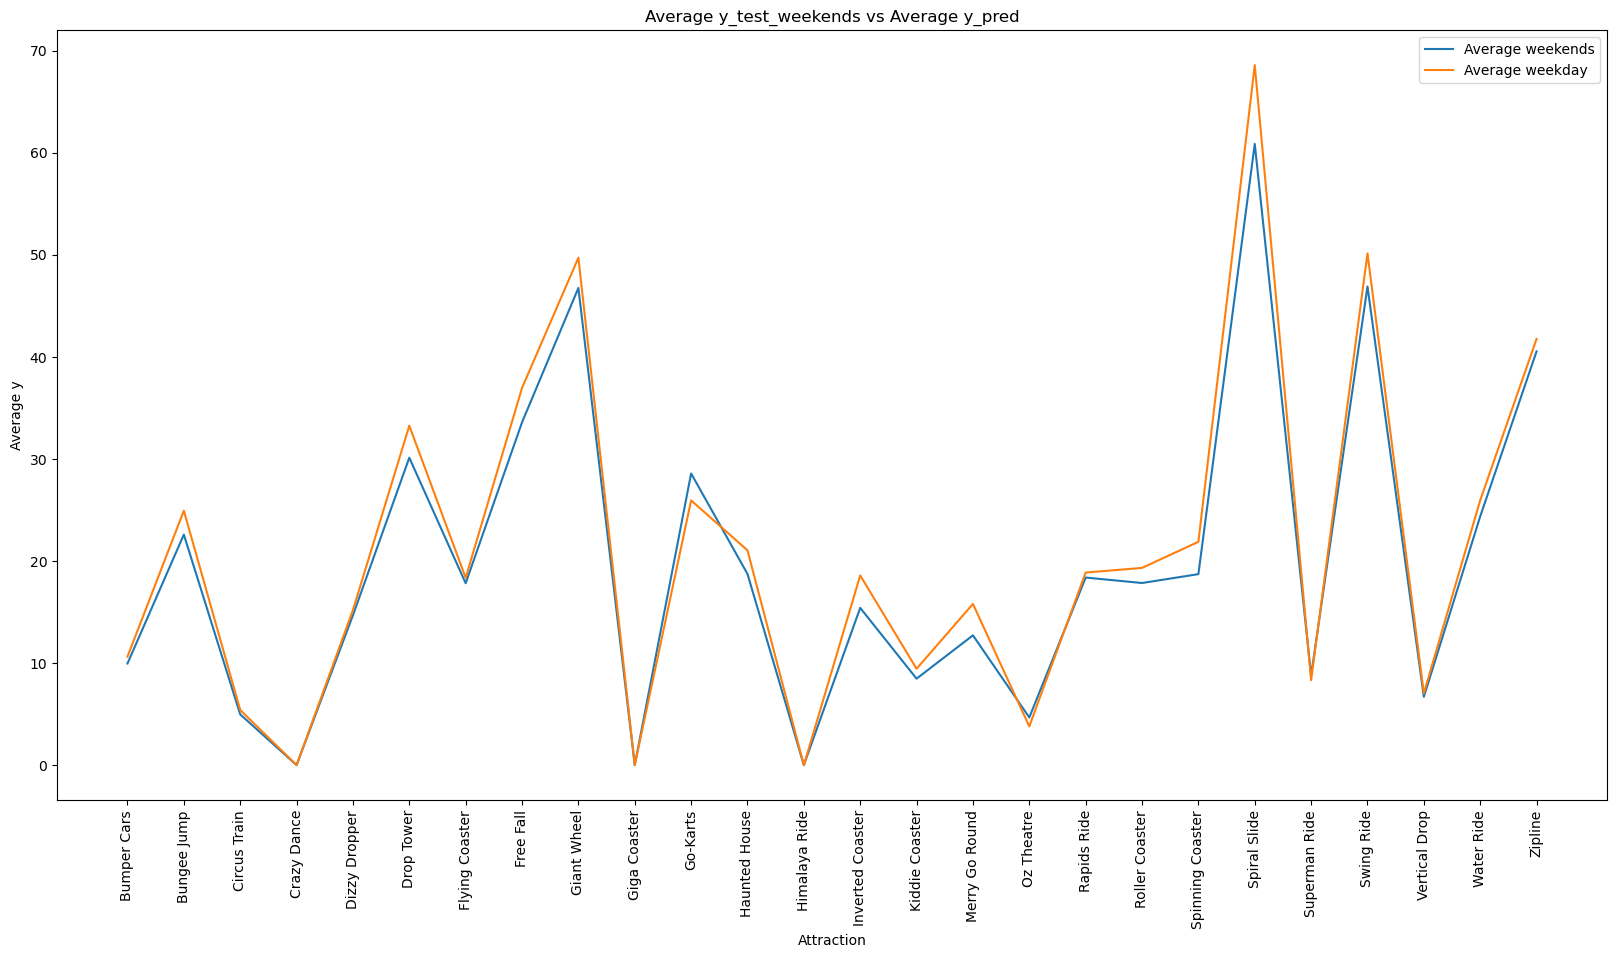

In [57]:
#plot the average_y_test_weekends and average_y_test_weekday
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(average_y_test_weekends['Attraction'], average_y_test_weekends['Average y_test_weekends'], label='Average weekends')
plt.plot(average_y_test_weekday['Attraction'], average_y_test_weekday['Average y_test_weekends'], label='Average weekday')
plt.xlabel('Attraction')
plt.ylabel('Average y')
plt.title('Average y_test_weekends vs Average y_pred')
plt.xticks(rotation=90)
plt.legend()
plt.show()


# Predictions using all the models and get the avg

- XGB name: best_model
- LightBGM name: gbm